# National Athlete Performance Data Platform

## Project Overview
A centralized, digital performance and analytics platform to support national sports federations and youth training centers in optimizing athlete development, monitoring, and talent identification.

### Key Features:
- **Real-time Performance Monitoring**: Track physical performance, physiological metrics, training load & recovery
- **Injury Prevention**: Data-driven insights to reduce injury risk through proactive monitoring
- **Talent Identification**: Objective analytics to uncover high-potential youth athletes
- **Personalized Training**: Tailored programs to improve athlete performance and career longevity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Initial Analysis

In [2]:
# Load the athlete performance dataset
df = pd.read_csv('Athlete_Training_Recovery_Tracker_Dataset.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset Shape: {df.shape}")
print(f"\nDataset Overview:")
print(df.info())
print(f"\nFirst 5 records:")
df.head()

Dataset Shape: (1000, 11)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Athlete_ID          1000 non-null   object        
 1   Sport_Type          1000 non-null   object        
 2   Training_Hours      1000 non-null   float64       
 3   Training_Intensity  1000 non-null   int64         
 4   Sleep_Hours         1000 non-null   float64       
 5   Nutrition_Score     1000 non-null   int64         
 6   Fatigue_Level       1000 non-null   int64         
 7   Recovery_Index      1000 non-null   int64         
 8   Performance_Score   1000 non-null   int64         
 9   Injury_Risk         1000 non-null   object        
 10  Date                1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 86.1+ KB
None

First 5 records:


,Athlete_ID,Sport_Type,Training_Hours,Training_Intensity,Sleep_Hours,Nutrition_Score,Fatigue_Level,Recovery_Index,Performance_Score,Injury_Risk,Date
0,A0001,Badminton,4.49,2,5.0,78,9,93,68,High,2025-01-01
1,A0002,Athletics,3.68,6,5.2,68,9,52,94,Low,2025-01-02
2,A0003,Cricket,2.55,5,7.4,68,7,88,93,Medium,2025-01-03
3,A0004,Badminton,5.07,10,8.6,51,10,76,56,Low,2025-01-04
4,A0005,Tennis,4.42,9,6.0,90,3,82,93,Low,2025-01-05


## 2. Performance Analytics Dashboard

In [3]:
# Key Performance Indicators
total_athletes = df['Athlete_ID'].nunique()
sports_covered = df['Sport_Type'].nunique()
avg_performance = df['Performance_Score'].mean()
high_risk_athletes = df[df['Injury_Risk'] == 'High']['Athlete_ID'].nunique()

print("=== NATIONAL ATHLETE PERFORMANCE DASHBOARD ===")
print(f"📊 Total Athletes Monitored: {total_athletes:,}")
print(f"🏃 Sports Disciplines: {sports_covered}")
print(f"⚡ Average Performance Score: {avg_performance:.1f}/100")
print(f"⚠️  High-Risk Athletes: {high_risk_athletes} ({high_risk_athletes/total_athletes*100:.1f}%)")
print(f"📅 Monitoring Period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")

=== NATIONAL ATHLETE PERFORMANCE DASHBOARD ===
📊 Total Athletes Monitored: 1,000
🏃 Sports Disciplines: 8
⚡ Average Performance Score: 74.7/100
⚠️  High-Risk Athletes: 95 (9.5%)
📅 Monitoring Period: 2025-01-01 to 2027-09-27


## 3. Injury Risk Assessment & Prevention

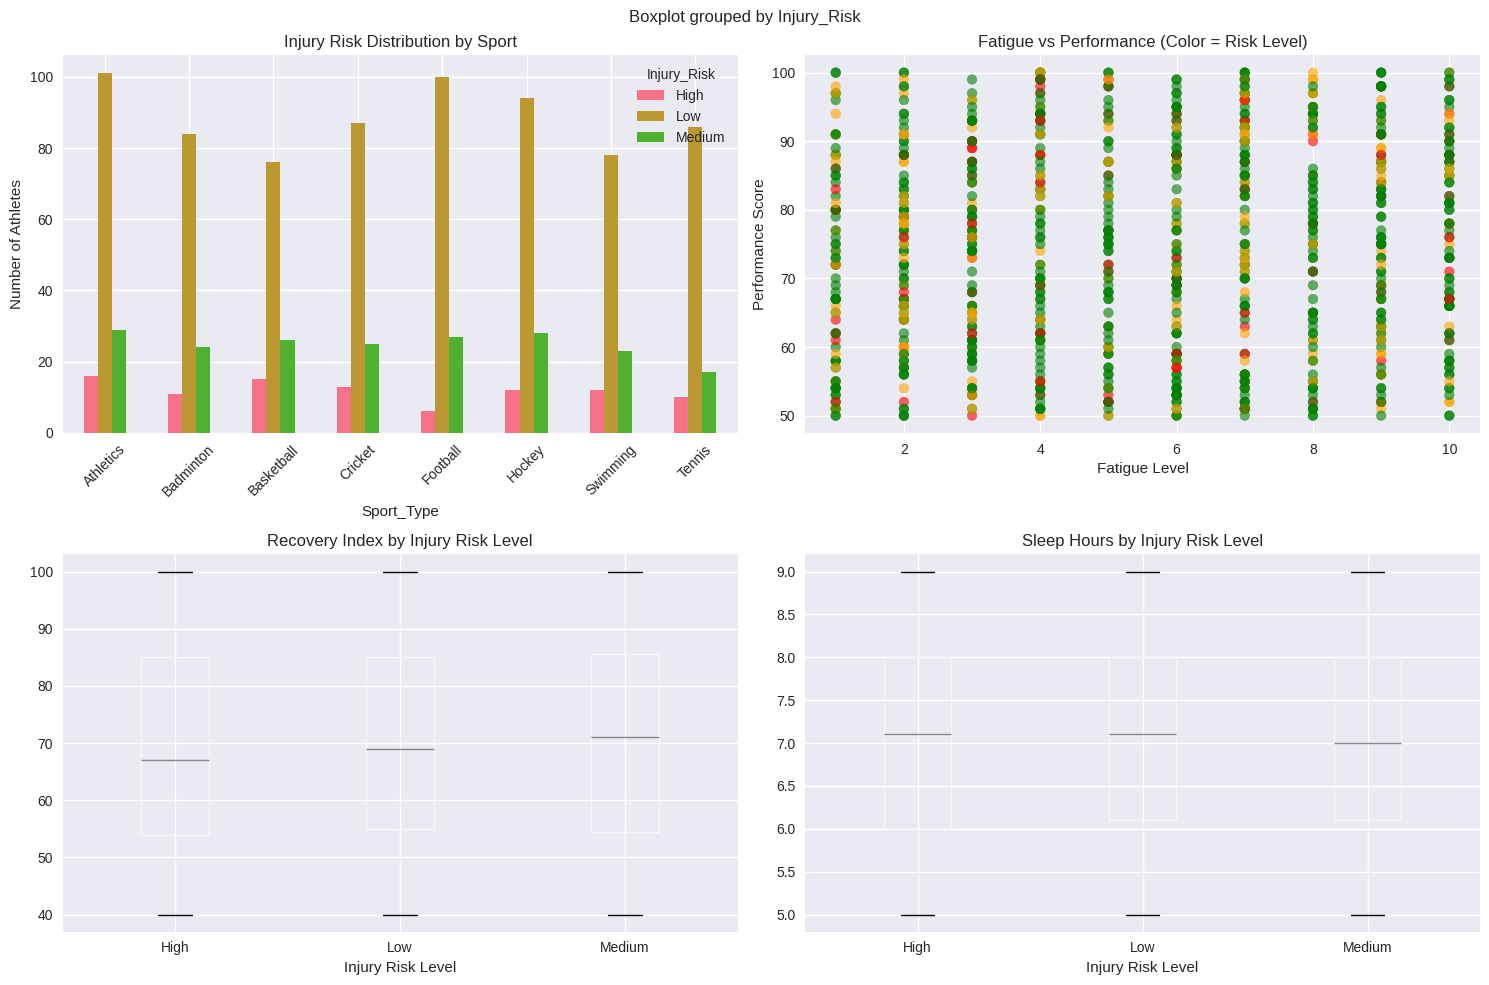


=== INJURY RISK FACTORS ANALYSIS ===
High Risk Athletes - Avg Fatigue: 5.7
Low Risk Athletes - Avg Fatigue: 5.6
High Risk Athletes - Avg Sleep: 7.0h
Low Risk Athletes - Avg Sleep: 7.1h
High Risk Athletes - Avg Recovery: 68.3
Low Risk Athletes - Avg Recovery: 69.9


In [4]:
# Injury Risk Analysis by Sport
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Risk distribution by sport
risk_by_sport = df.groupby(['Sport_Type', 'Injury_Risk']).size().unstack(fill_value=0)
risk_by_sport.plot(kind='bar', ax=axes[0,0], title='Injury Risk Distribution by Sport')
axes[0,0].set_ylabel('Number of Athletes')
axes[0,0].tick_params(axis='x', rotation=45)

# Fatigue vs Performance correlation
axes[0,1].scatter(df['Fatigue_Level'], df['Performance_Score'], alpha=0.6, c=df['Injury_Risk'].map({'Low': 'green', 'Medium': 'orange', 'High': 'red'}))
axes[0,1].set_xlabel('Fatigue Level')
axes[0,1].set_ylabel('Performance Score')
axes[0,1].set_title('Fatigue vs Performance (Color = Risk Level)')

# Recovery Index by Risk Level
df.boxplot(column='Recovery_Index', by='Injury_Risk', ax=axes[1,0])
axes[1,0].set_title('Recovery Index by Injury Risk Level')
axes[1,0].set_xlabel('Injury Risk Level')

# Sleep Hours impact on injury risk
df.boxplot(column='Sleep_Hours', by='Injury_Risk', ax=axes[1,1])
axes[1,1].set_title('Sleep Hours by Injury Risk Level')
axes[1,1].set_xlabel('Injury Risk Level')

plt.tight_layout()
plt.show()

# Risk factors analysis
print("\n=== INJURY RISK FACTORS ANALYSIS ===")
high_risk = df[df['Injury_Risk'] == 'High']
low_risk = df[df['Injury_Risk'] == 'Low']

print(f"High Risk Athletes - Avg Fatigue: {high_risk['Fatigue_Level'].mean():.1f}")
print(f"Low Risk Athletes - Avg Fatigue: {low_risk['Fatigue_Level'].mean():.1f}")
print(f"High Risk Athletes - Avg Sleep: {high_risk['Sleep_Hours'].mean():.1f}h")
print(f"Low Risk Athletes - Avg Sleep: {low_risk['Sleep_Hours'].mean():.1f}h")
print(f"High Risk Athletes - Avg Recovery: {high_risk['Recovery_Index'].mean():.1f}")
print(f"Low Risk Athletes - Avg Recovery: {low_risk['Recovery_Index'].mean():.1f}")

## 4. Talent Identification System

=== TOP TALENT IDENTIFICATION ===
Top 3 Athletes per Sport (Based on Comprehensive Talent Score):
Athlete_ID  Talent_Score  Performance_Score Injury_Risk
     A0723     87.500000                 85         Low
     A0718     86.633333                 94         Low
     A0694     86.155556                 90         Low
     A0048     87.844444                 92         Low
     A0891     84.133333                 91         Low
     A0683     83.455556                 88        High
     A0529     89.300000                 96      Medium
     A0364     86.700000                 94         Low
     A0757     86.466667                100         Low
     A0967     87.900000                 99      Medium
     A0913     87.300000                 96         Low
     A0879     85.177778                 86         Low
     A0573     86.844444                 90         Low
     A0137     86.200000                100         Low
     A0380     85.244444                 94      Medium
     A

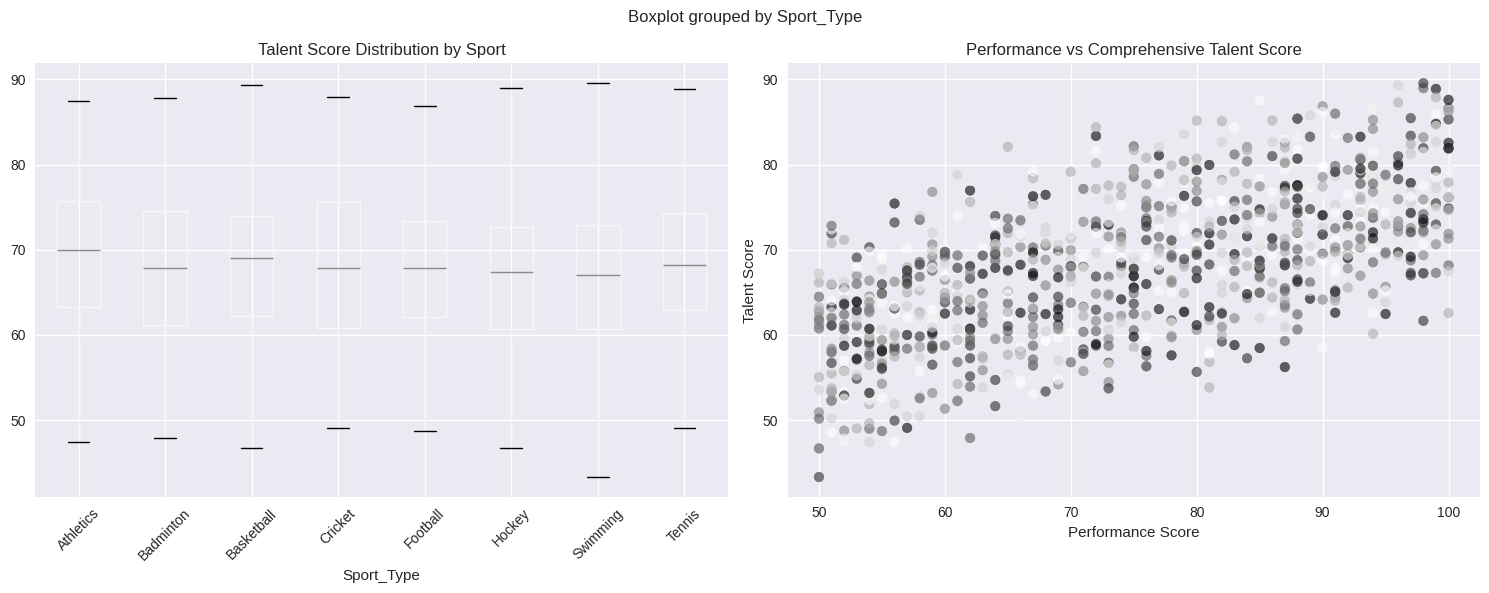

In [5]:
# Create talent score based on multiple factors
df['Talent_Score'] = (
    df['Performance_Score'] * 0.4 +
    (100 - df['Fatigue_Level'] * 10) * 0.2 +
    df['Recovery_Index'] * 0.2 +
    df['Nutrition_Score'] * 0.1 +
    (df['Sleep_Hours'] / 9 * 100) * 0.1
)

# Identify top talents by sport
top_talents = df.groupby('Sport_Type').apply(
    lambda x: x.nlargest(3, 'Talent_Score')[['Athlete_ID', 'Talent_Score', 'Performance_Score', 'Injury_Risk']]
).reset_index(drop=True)

print("=== TOP TALENT IDENTIFICATION ===")
print("Top 3 Athletes per Sport (Based on Comprehensive Talent Score):")
print(top_talents.to_string(index=False))

# Visualize talent distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Talent score distribution by sport
df.boxplot(column='Talent_Score', by='Sport_Type', ax=axes[0])
axes[0].set_title('Talent Score Distribution by Sport')
axes[0].tick_params(axis='x', rotation=45)

# Performance vs Talent Score
axes[1].scatter(df['Performance_Score'], df['Talent_Score'], alpha=0.6, c=df['Sport_Type'].astype('category').cat.codes)
axes[1].set_xlabel('Performance Score')
axes[1].set_ylabel('Talent Score')
axes[1].set_title('Performance vs Comprehensive Talent Score')

plt.tight_layout()
plt.show()

## 5. Personalized Training Recommendations

In [6]:
def generate_training_recommendations(athlete_data):
    """Generate personalized training recommendations based on athlete metrics"""
    recommendations = []
    
    # Fatigue-based recommendations
    if athlete_data['Fatigue_Level'] >= 8:
        recommendations.append("🔴 HIGH FATIGUE: Reduce training intensity by 30%, focus on recovery")
    elif athlete_data['Fatigue_Level'] >= 6:
        recommendations.append("🟡 MODERATE FATIGUE: Maintain current intensity, add recovery sessions")
    else:
        recommendations.append("🟢 LOW FATIGUE: Can increase training intensity by 10-15%")
    
    # Sleep-based recommendations
    if athlete_data['Sleep_Hours'] < 7:
        recommendations.append("😴 SLEEP: Increase sleep to 8-9 hours for optimal recovery")
    
    # Nutrition recommendations
    if athlete_data['Nutrition_Score'] < 70:
        recommendations.append("🍎 NUTRITION: Improve diet quality - consult sports nutritionist")
    
    # Recovery recommendations
    if athlete_data['Recovery_Index'] < 60:
        recommendations.append("🔄 RECOVERY: Add active recovery sessions, consider massage therapy")
    
    # Injury risk recommendations
    if athlete_data['Injury_Risk'] == 'High':
        recommendations.append("⚠️ INJURY RISK: Immediate medical assessment required")
    
    return recommendations

# Generate recommendations for sample athletes
sample_athletes = df.sample(5)

print("=== PERSONALIZED TRAINING RECOMMENDATIONS ===")
for _, athlete in sample_athletes.iterrows():
    print(f"\n🏃 Athlete {athlete['Athlete_ID']} ({athlete['Sport_Type']})")
    print(f"Performance: {athlete['Performance_Score']}/100 | Fatigue: {athlete['Fatigue_Level']}/10 | Sleep: {athlete['Sleep_Hours']}h")
    
    recommendations = generate_training_recommendations(athlete)
    for rec in recommendations:
        print(f"  • {rec}")

=== PERSONALIZED TRAINING RECOMMENDATIONS ===

🏃 Athlete A0320 (Swimming)
Performance: 98/100 | Fatigue: 10/10 | Sleep: 8.3h
  • 🔴 HIGH FATIGUE: Reduce training intensity by 30%, focus on recovery
  • 🔄 RECOVERY: Add active recovery sessions, consider massage therapy

🏃 Athlete A0609 (Athletics)
Performance: 76/100 | Fatigue: 8/10 | Sleep: 8.3h
  • 🔴 HIGH FATIGUE: Reduce training intensity by 30%, focus on recovery

🏃 Athlete A0583 (Athletics)
Performance: 82/100 | Fatigue: 2/10 | Sleep: 6.7h
  • 🟢 LOW FATIGUE: Can increase training intensity by 10-15%
  • 😴 SLEEP: Increase sleep to 8-9 hours for optimal recovery
  • 🔄 RECOVERY: Add active recovery sessions, consider massage therapy

🏃 Athlete A0306 (Cricket)
Performance: 80/100 | Fatigue: 3/10 | Sleep: 7.2h
  • 🟢 LOW FATIGUE: Can increase training intensity by 10-15%

🏃 Athlete A0634 (Football)
Performance: 94/100 | Fatigue: 6/10 | Sleep: 6.2h
  • 🟡 MODERATE FATIGUE: Maintain current intensity, add recovery sessions
  • 😴 SLEEP: Incre

## 6. Performance Trends and Monitoring

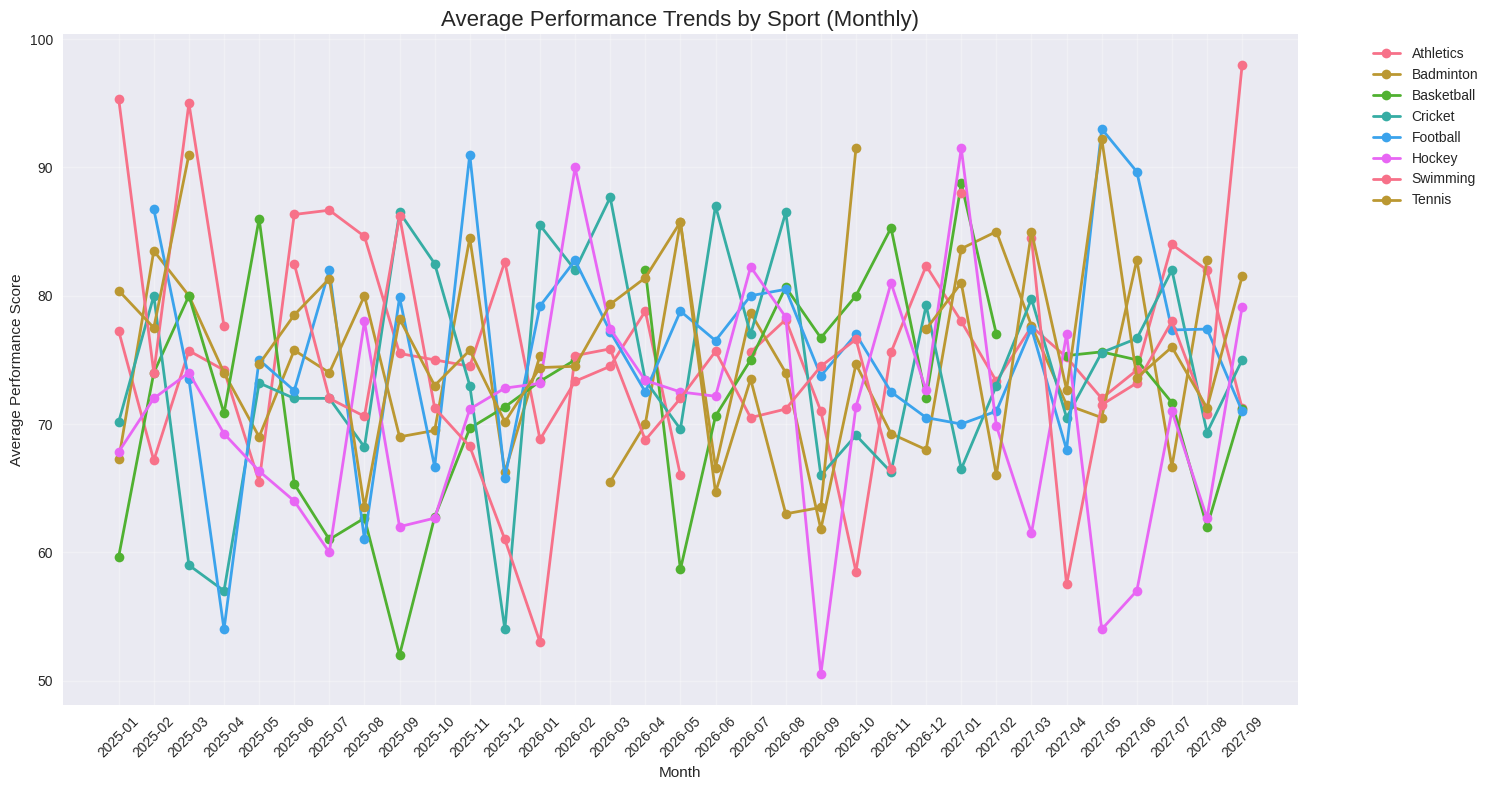

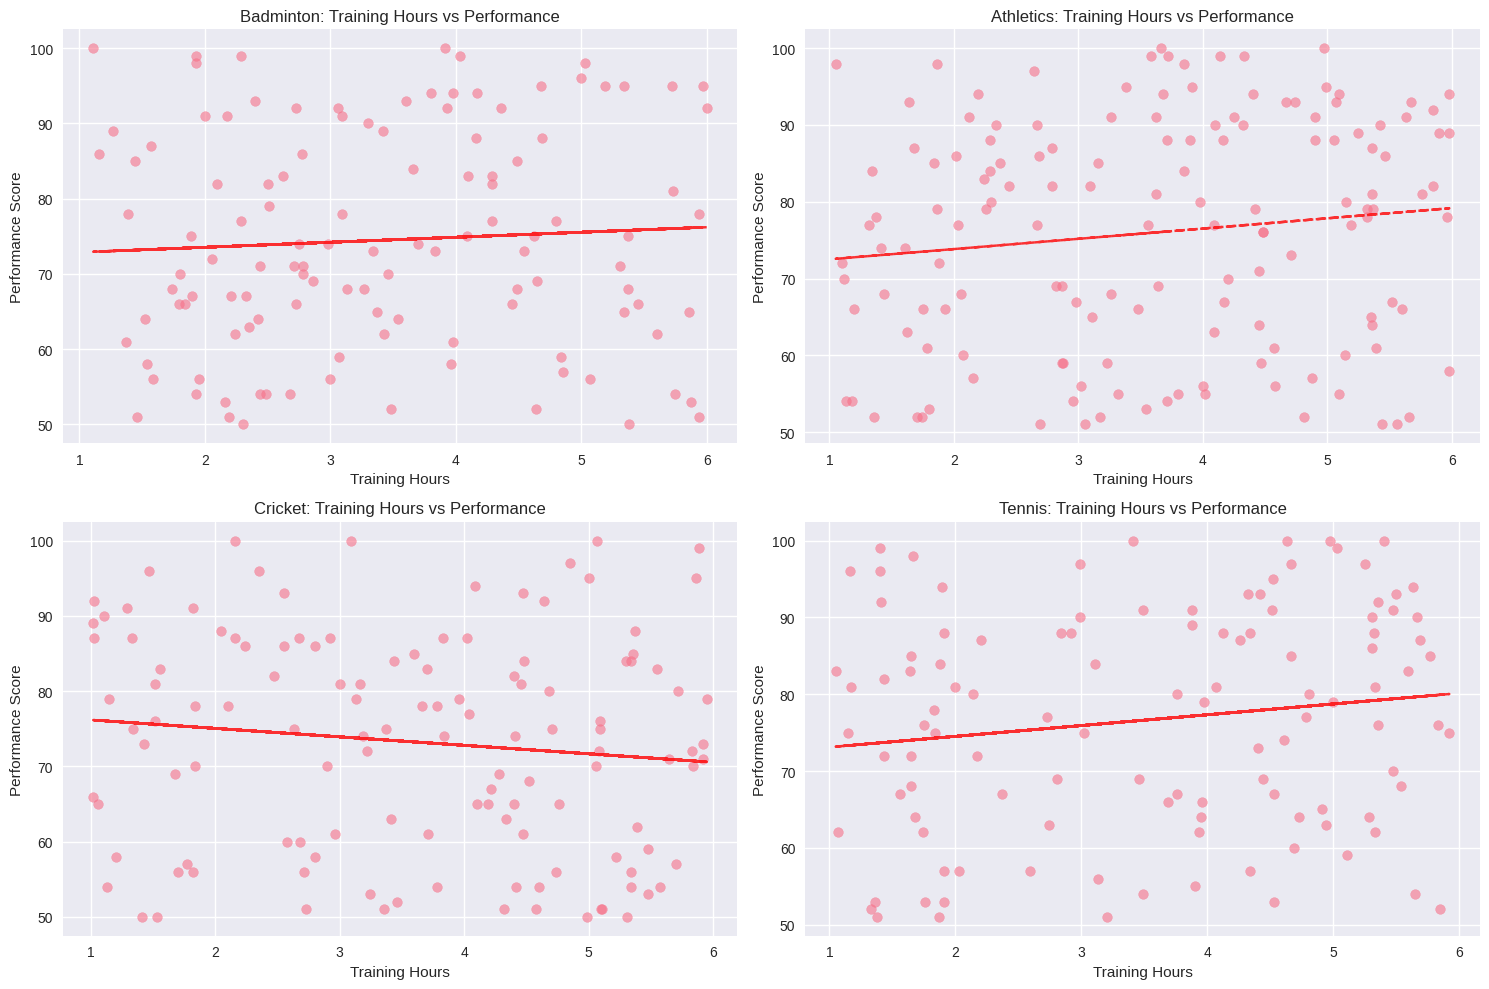

In [7]:
# Performance trends over time
monthly_performance = df.groupby([df['Date'].dt.to_period('M'), 'Sport_Type'])['Performance_Score'].mean().unstack()

plt.figure(figsize=(15, 8))
for sport in monthly_performance.columns:
    plt.plot(monthly_performance.index.astype(str), monthly_performance[sport], marker='o', label=sport, linewidth=2)

plt.title('Average Performance Trends by Sport (Monthly)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Performance Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Training load analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training hours vs performance by sport
for i, sport in enumerate(df['Sport_Type'].unique()[:4]):
    sport_data = df[df['Sport_Type'] == sport]
    row, col = i // 2, i % 2
    axes[row, col].scatter(sport_data['Training_Hours'], sport_data['Performance_Score'], alpha=0.6)
    axes[row, col].set_title(f'{sport}: Training Hours vs Performance')
    axes[row, col].set_xlabel('Training Hours')
    axes[row, col].set_ylabel('Performance Score')
    
    # Add trend line
    z = np.polyfit(sport_data['Training_Hours'], sport_data['Performance_Score'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(sport_data['Training_Hours'], p(sport_data['Training_Hours']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

## 7. Comprehensive Athlete Profiling

In [8]:
def create_athlete_profile(athlete_id):
    """Create comprehensive profile for specific athlete"""
    athlete_data = df[df['Athlete_ID'] == athlete_id].iloc[-1]  # Latest record
    
    print(f"\n=== ATHLETE PROFILE: {athlete_id} ===")
    print(f"Sport: {athlete_data['Sport_Type']}")
    print(f"Latest Assessment Date: {athlete_data['Date'].strftime('%Y-%m-%d')}")
    print(f"\n📊 PERFORMANCE METRICS:")
    print(f"  Performance Score: {athlete_data['Performance_Score']}/100")
    print(f"  Training Hours: {athlete_data['Training_Hours']:.1f}h")
    print(f"  Training Intensity: {athlete_data['Training_Intensity']}/10")
    print(f"  Talent Score: {athlete_data['Talent_Score']:.1f}/100")
    
    print(f"\n🏥 HEALTH & RECOVERY:")
    print(f"  Injury Risk: {athlete_data['Injury_Risk']}")
    print(f"  Fatigue Level: {athlete_data['Fatigue_Level']}/10")
    print(f"  Recovery Index: {athlete_data['Recovery_Index']}/100")
    print(f"  Sleep Hours: {athlete_data['Sleep_Hours']:.1f}h")
    print(f"  Nutrition Score: {athlete_data['Nutrition_Score']}/100")
    
    # Performance ranking within sport
    sport_athletes = df[df['Sport_Type'] == athlete_data['Sport_Type']]
    performance_rank = (sport_athletes['Performance_Score'] < athlete_data['Performance_Score']).sum() + 1
    total_in_sport = len(sport_athletes['Athlete_ID'].unique())
    
    print(f"\n🏆 RANKINGS:")
    print(f"  Performance Rank in {athlete_data['Sport_Type']}: {performance_rank}/{total_in_sport}")
    print(f"  Percentile: {((total_in_sport - performance_rank) / total_in_sport * 100):.1f}%")
    
    return athlete_data

# Create profiles for top performers
top_performers = df.nlargest(3, 'Talent_Score')['Athlete_ID'].unique()
for athlete_id in top_performers:
    create_athlete_profile(athlete_id)


=== ATHLETE PROFILE: A0980 ===
Sport: Swimming
Latest Assessment Date: 2027-09-07

📊 PERFORMANCE METRICS:
  Performance Score: 98/100
  Training Hours: 3.2h
  Training Intensity: 9/10
  Talent Score: 89.6/100

🏥 HEALTH & RECOVERY:
  Injury Risk: Medium
  Fatigue Level: 1/10
  Recovery Index: 92/100
  Sleep Hours: 7.7h
  Nutrition Score: 54/100

🏆 RANKINGS:
  Performance Rank in Swimming: 102/113
  Percentile: 9.7%

=== ATHLETE PROFILE: A0529 ===
Sport: Basketball
Latest Assessment Date: 2026-06-13

📊 PERFORMANCE METRICS:
  Performance Score: 96/100
  Training Hours: 2.6h
  Training Intensity: 4/10
  Talent Score: 89.3/100

🏥 HEALTH & RECOVERY:
  Injury Risk: Medium
  Fatigue Level: 3/10
  Recovery Index: 94/100
  Sleep Hours: 8.1h
  Nutrition Score: 91/100

🏆 RANKINGS:
  Performance Rank in Basketball: 107/117
  Percentile: 8.5%

=== ATHLETE PROFILE: A0977 ===
Sport: Hockey
Latest Assessment Date: 2027-09-04

📊 PERFORMANCE METRICS:
  Performance Score: 98/100
  Training Hours: 5.0h
  

## 8. Platform Impact Summary & Recommendations

In [9]:
# Calculate platform impact metrics
injury_prevention_impact = {
    'high_risk_identified': len(df[df['Injury_Risk'] == 'High']),
    'athletes_with_poor_recovery': len(df[df['Recovery_Index'] < 50]),
    'sleep_deprived_athletes': len(df[df['Sleep_Hours'] < 7]),
    'high_fatigue_athletes': len(df[df['Fatigue_Level'] >= 8])
}

talent_identification_impact = {
    'top_10_percent_talents': len(df[df['Talent_Score'] >= df['Talent_Score'].quantile(0.9)]),
    'high_performers': len(df[df['Performance_Score'] >= 90]),
    'consistent_performers': len(df[(df['Performance_Score'] >= 80) & (df['Injury_Risk'] == 'Low')])
}

print("\n" + "="*60)
print("🎯 NATIONAL ATHLETE PERFORMANCE PLATFORM - IMPACT SUMMARY")
print("="*60)

print(f"\n🏥 INJURY PREVENTION & HEALTH MONITORING:")
print(f"  • {injury_prevention_impact['high_risk_identified']} high-risk athletes identified for immediate intervention")
print(f"  • {injury_prevention_impact['athletes_with_poor_recovery']} athletes need recovery program optimization")
print(f"  • {injury_prevention_impact['sleep_deprived_athletes']} athletes require sleep hygiene improvement")
print(f"  • {injury_prevention_impact['high_fatigue_athletes']} athletes showing signs of overtraining")

print(f"\n🌟 TALENT IDENTIFICATION & DEVELOPMENT:")
print(f"  • {talent_identification_impact['top_10_percent_talents']} elite talents identified (top 10%)")
print(f"  • {talent_identification_impact['high_performers']} athletes achieving 90+ performance scores")
print(f"  • {talent_identification_impact['consistent_performers']} athletes showing consistent high performance with low injury risk")

print(f"\n📈 PLATFORM BENEFITS:")
print(f"  • Real-time monitoring of {total_athletes:,} athletes across {sports_covered} sports")
print(f"  • Data-driven insights preventing potential injuries")
print(f"  • Objective talent identification reducing selection bias")
print(f"  • Personalized training recommendations for optimal performance")
print(f"  • Centralized national database for sports development")

print(f"\n🎯 MINISTRY VALUE PROPOSITION:")
print(f"  • Reduced healthcare costs through injury prevention")
print(f"  • Improved international competitiveness through better talent identification")
print(f"  • Enhanced athlete career longevity and performance")
print(f"  • Evidence-based sports policy and resource allocation")
print(f"  • Standardized nationwide athlete development framework")

print("\n" + "="*60)


🎯 NATIONAL ATHLETE PERFORMANCE PLATFORM - IMPACT SUMMARY

🏥 INJURY PREVENTION & HEALTH MONITORING:
  • 95 high-risk athletes identified for immediate intervention
  • 152 athletes need recovery program optimization
  • 459 athletes require sleep hygiene improvement
  • 290 athletes showing signs of overtraining

🌟 TALENT IDENTIFICATION & DEVELOPMENT:
  • 100 elite talents identified (top 10%)
  • 213 athletes achieving 90+ performance scores
  • 280 athletes showing consistent high performance with low injury risk

📈 PLATFORM BENEFITS:
  • Real-time monitoring of 1,000 athletes across 8 sports
  • Data-driven insights preventing potential injuries
  • Objective talent identification reducing selection bias
  • Personalized training recommendations for optimal performance
  • Centralized national database for sports development

🎯 MINISTRY VALUE PROPOSITION:
  • Reduced healthcare costs through injury prevention
  • Improved international competitiveness through better talent identific